# Car Accident Midterm
## Mingjun Ma

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit here.

This dataset was collected in real-time using multiple Traffic APIs. It contains accident data collected from February 2016 to March 2023 for the Contiguous United States.

Description for Each and Every Columns: This Data comprises of 46 columns and 7,728,394 rows

ID: This is a unique identifier of the accident record.

Source: Source of raw accident data

Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

Start_Time: Shows start time of the accident in local time zone.

End_Time: Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

Start_Lat: Shows latitude in GPS coordinate of the start point.

Start_Lng: Shows longitude in GPS coordinate of the start point.

End_Lat: Shows latitude in GPS coordinate of the end point.

End_Lng: Shows longitude in GPS coordinate of the end point.

Distance(mi): The length of the road extent affected by the accident in miles.

Description: Shows a human provided description of the accident.

Street: Shows the street name in address field.

City: Shows the city in address field.

County: Shows the county in address field.

State: Shows the state in address field.

Zipcode: Shows the zipcode in address field.

Country: Shows the country in address field.

Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).

Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.

Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).

Temperature(F): Shows the temperature (in Fahrenheit).

Wind_Chill(F): Shows the wind chill (in Fahrenheit).

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects
import geopandas as gpd
from shapely.geometry import Point, Polygon


import warnings
warnings.filterwarnings('ignore')

In [47]:
df =pd.read_csv('US_Accidents_March23.csv')
df 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [27]:
#df.drop(columns=['ID', 'Source',"Start_Lat", "Start_Lng", "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [28]:
#df.dropna(inplace = True)

In [4]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

In [26]:
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  444.466 min


In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)

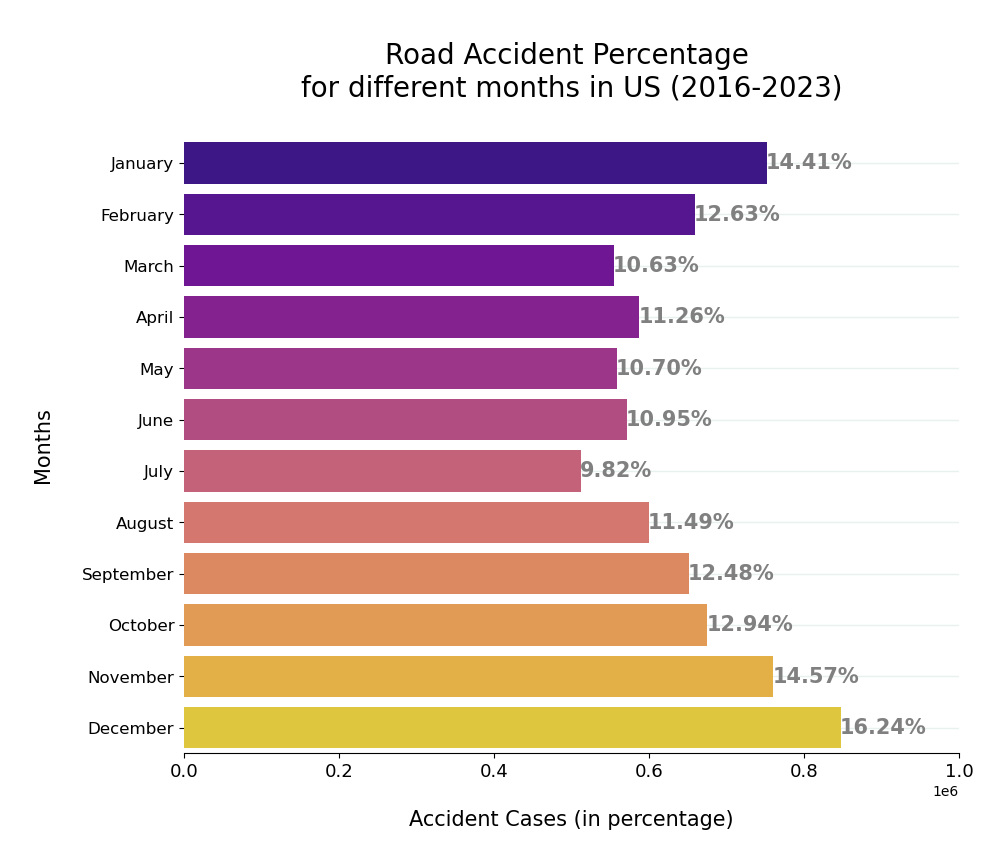

In [30]:
fig, ax = plt.subplots(figsize = (10,8))

cmap = cm.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='plasma')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-1000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='left', va='center', fontsize=15, color='grey', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different months in US (2016-2023)\n', size=20, color='black')
plt.xlabel('\nAccident Cases (in percentage)\n', fontsize=15, color='black')
plt.ylabel('\nMonths\n', fontsize=15, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 1000000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 1000000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

#MA = mpatches.Patch(color=clrs[0], label='Month with Maximum\n no. of Road Accidents')
#MI = mpatches.Patch(color=clrs[-1], label='Month with Minimum\n no. of Road Accidents')

#ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
#          labelcolor=[clrs[0], 'grey'], edgecolor='white');

In [6]:
states = gpd.read_file('tl_2022_us_state.shp')

In [7]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

In [8]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

geo_df['year'] = geo_df.Start_Time.dt.year

geo_df['State'] = geo_df['State'].apply(convert)

In [9]:
part=geo_df.sample(frac = 0.1)

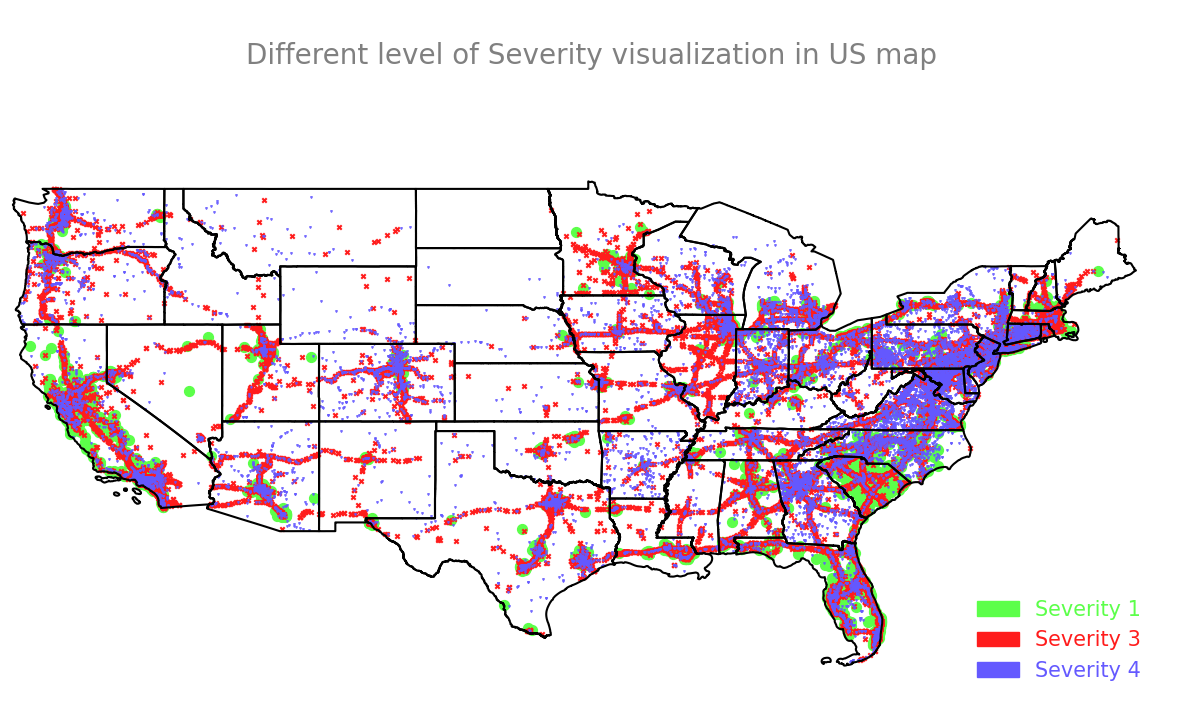

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='black');

part[part['Severity'] == 1].plot(ax=ax, markersize=50, color='#5cff4a', marker='o', label='Severity 1');
part[part['Severity'] == 3].plot(ax=ax, markersize=10, color='#ff1c1c', marker='x', label='Severity 3');
part[part['Severity'] == 4].plot(ax=ax, markersize=1, color='#6459ff', marker='v', label='Severity 4');
#part[part['Severity'] == 2].plot(ax=ax, markersize=5, color='#ffb340', marker='+', label='Severity 2',alpha=0);

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nDifferent level of Severity visualization in US map', size=20, color='grey');

One = mpatches.Patch(color='#5cff4a', label='Severity 1')
#Two = mpatches.Patch(color='#ffb340', label='Severity 2')
Three = mpatches.Patch(color='#ff1c1c', label='Severity 3')
Four = mpatches.Patch(color='#6459ff', label='Severity 4')

ax.legend(handles=[One,  Three, Four], prop={'size': 15}, loc='lower right', borderpad=1, 
          labelcolor=['#5cff4a',  '#ff1c1c', '#6459ff'], edgecolor='white');


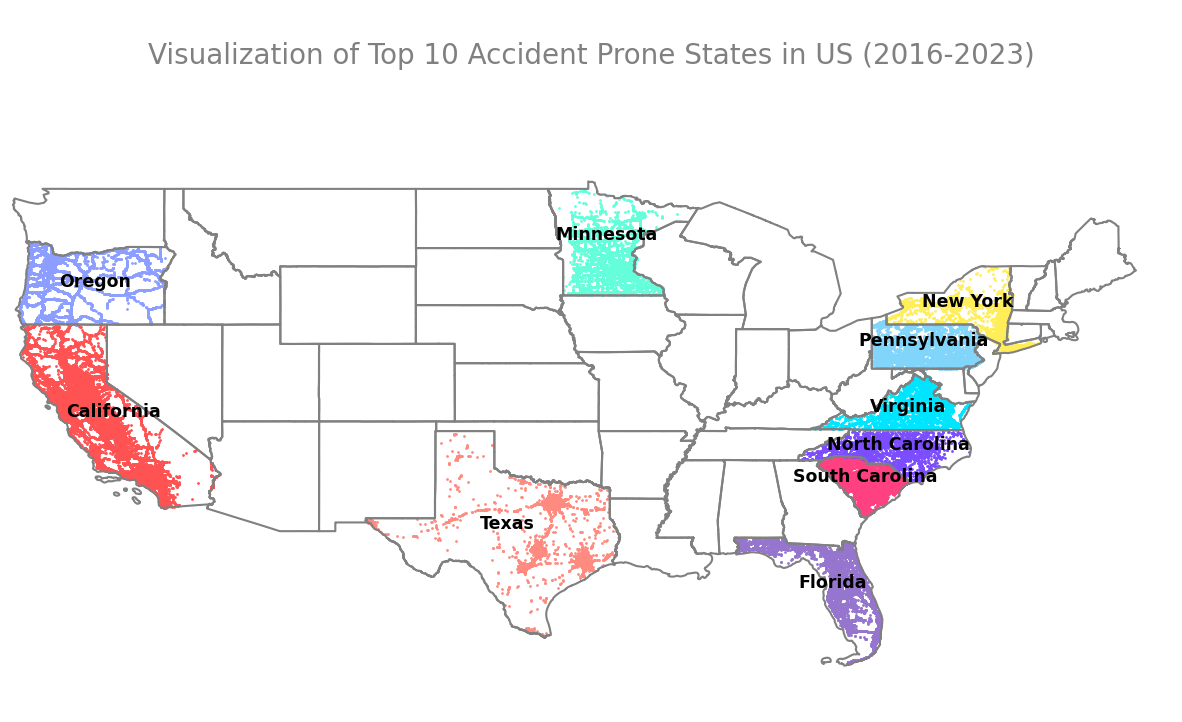

In [56]:
top_ten_states_name = list(state_df['State'].head(10))
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])

states.boundary.plot(ax=ax, color='grey');
states.apply(lambda x: None if (x.NAME not in top_ten_states_name) else ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color='black', weight='bold', fontsize=12.5), axis=1);

# CFOTNYMVNPI
colors = ['#FF5252','#9575CD','#FF8A80','#FF4081','#FFEE58','#7C4DFF','#00E5FF','#81D4FA','#64FFDA','#8C9EFF']
count = 0
for i in list(state_df['State'].head(10)):
    part[part['State'] == i].plot(ax=ax, markersize=1, color=colors[count], marker='o');
    count += 1

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone States in US (2016-2023)', size=20, color='grey');

In [11]:
geo_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,geometry,year
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,Night,Night,Night,Night,POINT (-84.05872 39.86515),2016
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,Night,Night,Night,Day,POINT (-82.83118 39.92806),2016
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,True,False,Night,Night,Day,Day,POINT (-84.03261 39.06315),2016
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,Night,Day,Day,Day,POINT (-84.20558 39.74775),2016
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,True,False,Day,Day,Day,Day,POINT (-84.18835 39.62778),2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,Day,Day,Day,Day,POINT (-117.37936 34.00248),2019
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,Day,Day,Day,Day,POINT (-117.14806 32.76696),2019
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,Day,Day,Day,Day,POINT (-117.84779 33.77545),2019
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,Day,Day,Day,Day,POINT (-118.40302 33.99246),2019


In [12]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

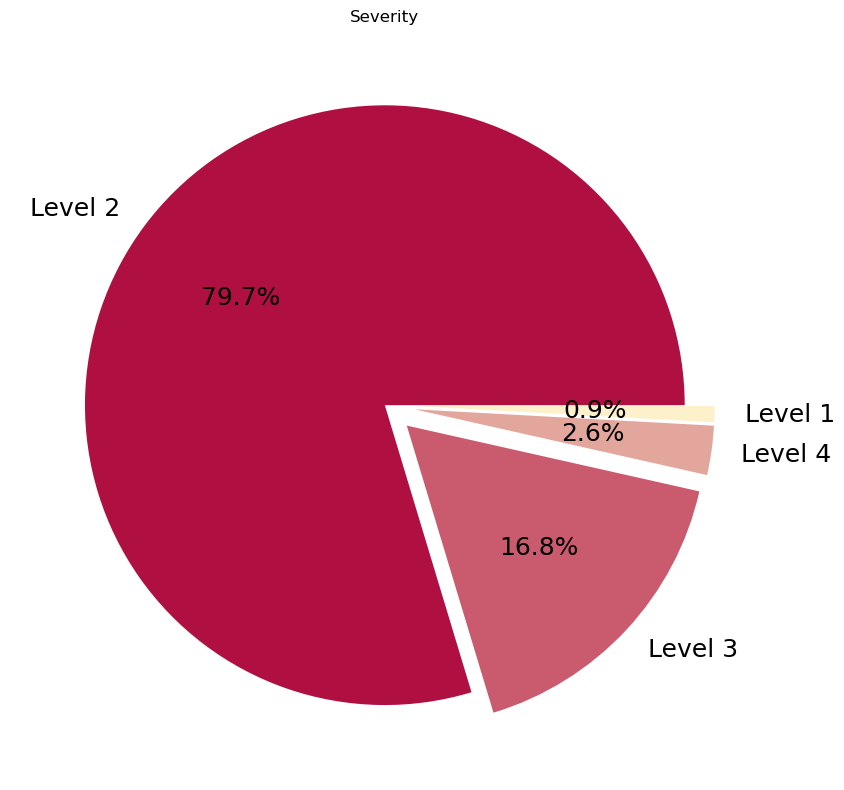

In [51]:
plt.rcParams['figure.figsize'] = [16, 8]
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

##ttc_718|cancertype| Cancer type (6+1) categories
explode = [0, 0.1, 0.1, 0.1]
colors=['#B01041','#CA5B6F','#E3A69D','#FDF1CB']
#count = df.groupby(['Severity'])['Severity'].count().reset_index(name='count')
s = df['Severity'].value_counts()
plt.pie(s,labels = ['Level 2', "Level 3","Level 4","Level 1"], autopct='%1.1f%%',explode = explode,colors=colors, textprops={'fontsize': 18})
#plt.text()
plt.title("Severity")
plt.tight_layout()
#plt.savefig('cancertype.png')

In [18]:
print("original size: ", df.shape)
# drop features with missing values
df_c = df.dropna(axis=1)
print("size after drop columns: ", df_c.shape)

original size:  (7728394, 46)
size after drop columns:  (7728394, 24)


In [19]:
print("original size: ", df.shape)
# drop rows with missing values
df_r = df.dropna(axis=0)
print("size after drop rows: ", df_r.shape)

original size:  (7728394, 46)
size after drop rows:  (3554549, 46)


# Stratified Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

y = df['Severity']
X = df

#first split
X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=1030,stratify=df[['Severity']])

In [59]:
#second split
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, train_size=0.75 ,random_state=1030,stratify=X_other[['Severity']])

In [60]:
X_train.drop(columns=['Severity'],inplace=True)
X_val.drop(columns=['Severity'],inplace=True)
X_test.drop(columns=['Severity'],inplace=True)

In [61]:
X_train

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
80702,A-80709,Source2,2016-09-30 14:48:48,2016-09-30 15:18:25,34.470448,-117.346001,NaN,NaN,0.000,Accident on I-15 Northbound at Exit 147 Bear V...,...,False,False,False,False,False,False,Day,Day,Day,Day
6829581,A-6878757,Source1,2020-12-31 06:23:00,2020-12-31 08:23:10,34.581881,-118.133872,34.577631,-118.133782,0.294,Incident on CA-14 SB near PALMDALE BLVD Drive ...,...,False,False,False,False,False,False,Night,Night,Day,Day
1570255,A-1580099,Source2,2020-01-07 15:49:51,2020-01-07 16:49:26,38.361687,-122.712708,NaN,NaN,0.000,#2 #3 lane blocked due to accident on US-101 N...,...,False,False,False,False,False,False,Day,Day,Day,Day
6777312,A-6826386,Source1,2020-10-05 18:55:00,2020-10-05 20:38:50,40.851604,-73.952048,40.853183,-73.960052,0.432,Incident on GEORGE WASHINGTON BRG WB near NEW ...,...,False,False,False,False,False,False,Night,Day,Day,Day
327433,A-327443,Source2,2017-02-07 05:58:42,2017-02-07 06:28:11,40.730511,-74.085197,NaN,NaN,0.010,Restrictions due to accident pedestrian involv...,...,False,False,False,False,True,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163536,A-6209135,Source1,2021-04-08 06:05:00,2021-04-08 13:12:00,42.159673,-88.047660,42.163352,-88.055033,0.455,Stationary traffic on US-12 W from E Lake Cook...,...,False,False,False,False,False,False,Night,Day,Day,Day
693863,A-703554,Source2,2022-02-19 06:10:03,2022-02-19 07:25:36,35.047291,-81.808975,NaN,NaN,5.030,Right lane blocked due to crash on I-85 Southb...,...,False,False,False,False,False,False,Night,Night,Night,Day
1761964,A-1771821,Source2,2019-10-23 08:30:42,2019-10-23 09:05:00,40.148979,-75.033463,NaN,NaN,0.000,Accident on County Line Rd at April Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
6255149,A-6301247,Source1,2021-07-09 08:30:00.000000000,2021-07-09 08:56:30.000000000,38.560722,-121.480876,38.563504,-121.491572,0.609,Slow traffic on CA-16 W - US-50 W - I-80 Bus W...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [62]:
X_val

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1944033,A-1953896,Source2,2019-07-06 13:59:07,2019-07-06 15:13:59,34.067265,-81.142181,NaN,NaN,0.000,Accident on SC-67 Piney Grove Rd at I-26 Exit ...,...,False,False,False,False,False,False,Day,Day,Day,Day
1118869,A-1128644,Source2,2021-03-06 14:18:05,2021-03-06 15:04:00,30.354500,-81.669029,NaN,NaN,0.360,Entry ramp to I-95 Southbound from W 20th St E...,...,False,False,False,False,False,False,Day,Day,Day,Day
3505898,A-3515781,Source1,2016-07-14 15:44:40,2016-07-14 21:44:40,47.206560,-111.780744,47.222210,-111.775180,1.112,At Exit 250 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
525872,A-527136,Source2,2022-08-25 08:10:48,2022-08-25 08:41:00,37.719284,-122.399544,NaN,NaN,0.000,Crash on US-101 Northbound at Exits 429B 429C ...,...,False,False,False,False,False,False,Day,Day,Day,Day
5698485,A-5741327,Source1,2021-12-02 00:36:00,2021-12-02 14:45:00,36.423658,-86.714476,36.465028,-86.685006,3.294,Incident on I-65 NB near MM 105 Road closed. T...,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202525,A-4234218,Source1,2023-01-24 07:40:36,2023-01-24 09:15:41,39.294546,-84.461462,39.294720,-84.462995,0.083,Incident on I-275 WB near OH-747 Drive with ca...,...,False,False,False,False,False,False,Night,Day,Day,Day
7214063,A-7263424,Source1,2020-02-13 21:50:00,2020-02-13 23:08:07,34.146858,-118.370379,34.146858,-118.370379,0.000,At Vineland Ave/Exit 12C - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2924073,A-2933952,Source2,2018-03-09 11:17:30,2018-03-09 11:47:16,42.973778,-83.712906,NaN,NaN,0.000,Accident on Bristol Rd at Van Slyke Rd.,...,False,False,False,False,True,False,Day,Day,Day,Day
7568982,A-7618350,Source1,2018-02-11 15:48:13,2018-02-11 21:48:13,29.769982,-95.350947,29.769982,-95.350947,0.000,At US-59/Exit 770 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [63]:
X_test

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4258710,A-4290834,Source1,2022-09-15 09:15:55.000000000,2022-09-15 09:40:25.000000000,35.269910,-80.814098,35.274231,-80.810805,0.352,Stationary traffic on N Graham St from Norris ...,...,False,False,False,False,False,False,Day,Day,Day,Day
7094176,A-7143515,Source1,2020-03-29 19:08:05,2020-03-29 19:38:05,37.012910,-76.456410,36.967700,-76.511790,4.370,At James River Bridge (South) - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
6305197,A-6351607,Source1,2021-01-31 14:50:00,2021-01-31 19:30:03,28.001006,-82.004173,27.998086,-81.993903,0.658,Incident on FL-570 near MM 4 Expect delays.,...,False,False,False,False,False,False,Day,Day,Day,Day
5507919,A-5549660,Source1,2021-09-09 06:55:51,2021-09-09 08:12:59,25.648121,-80.391129,25.649215,-80.391187,0.076,Incident on SW 122ND AVE WB near SW 128TH ST D...,...,False,False,False,False,False,False,Night,Day,Day,Day
3144948,A-3154827,Source2,2017-12-28 09:27:41,2017-12-28 09:57:26,34.154522,-118.396576,NaN,NaN,0.000,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421786,A-5462997,Source1,2022-03-24 14:43:00.000000000,2022-03-24 16:03:55.000000000,27.333597,-82.541598,27.333689,-82.541754,0.011,Incident on S PALM AVE near RINGLING BLVD Expe...,...,False,False,False,False,False,False,Day,Day,Day,Day
2823270,A-2833149,Source2,2018-05-18 10:08:05,2018-05-18 10:37:38,45.270111,-93.542290,NaN,NaN,0.000,Accident on US-169 Highway 10 Eastbound at 165...,...,False,False,True,False,False,False,Day,Day,Day,Day
2942565,A-2952444,Source2,2018-03-17 18:10:35,2018-03-17 18:40:00,34.127281,-117.201897,NaN,NaN,0.000,Accident on CA-330 Northbound at CA-210.,...,False,False,False,False,False,False,Day,Day,Day,Day
4488828,A-4522830,Source1,2022-12-22 16:09:00.000000000,2022-12-22 18:09:18.000000000,34.292813,-118.361511,34.286675,-118.369068,0.605,Incident on LITTLE TUJUNGA CANYON RD near MM 1...,...,False,False,True,False,False,False,Day,Day,Day,Day


In [66]:
df_with_missing=df[df.columns[df.isnull().mean()>0]]
df_with_missing

,End_Lat,End_Lng,Description,Street,City,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,NaN,NaN,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,...,29.68,10.0,Calm,NaN,0.02,Light Rain,Night,Night,Night,Night
1,NaN,NaN,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,...,29.65,10.0,Calm,NaN,0.00,Light Rain,Night,Night,Night,Day
2,NaN,NaN,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,...,29.67,10.0,SW,3.5,NaN,Overcast,Night,Night,Day,Day
3,NaN,NaN,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,...,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Night,Day,Day,Day
4,NaN,NaN,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,...,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,33.99888,-117.37094,At Market St - Accident.,Pomona Fwy E,Riverside,92501,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,...,28.92,10.0,W,13.0,0.00,Fair,Day,Day,Day,Day
7728390,32.76555,-117.15363,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,92108,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,...,29.39,10.0,SW,6.0,0.00,Fair,Day,Day,Day,Day
7728391,33.77740,-117.85727,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,92866,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,...,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,Day,Day,Day,Day
7728392,33.98311,-118.39565,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,90230,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,...,29.62,10.0,SW,8.0,0.00,Fair,Day,Day,Day,Day


In [68]:
df_with_missing.isnull().sum()

End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64

In [72]:
df_with_missing.isnull().sum() / len(df_with_missing) *100

End_Lat                  44.029355
End_Lng                  44.029355
Description               0.000065
Street                    0.140637
City                      0.003274
Zipcode                   0.024779
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
dtype: float64

In [73]:
df.drop(columns=['ID', 'Source',"Start_Lat", "Start_Lng", "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [93]:
df.drop(columns=["City","County"], inplace=True)

In [74]:
df.dropna(inplace = True)

In [94]:
df

,Severity,Start_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,2016-02-08 07:44:26,0.010,OH,37.9,35.5,97.0,29.63,7.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,2016-02-08 08:10:04,0.010,OH,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,2016-02-08 08:21:27,0.010,OH,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,2016-02-08 08:39:43,0.010,OH,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,2016-02-08 10:11:15,0.000,OH,33.8,29.6,100.0,29.62,2.0,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,2,2019-08-23 18:03:25,0.543,CA,86.0,86.0,40.0,28.92,10.0,W,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,2,2019-08-23 19:11:30,0.338,CA,70.0,70.0,73.0,29.39,10.0,SW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,2,2019-08-23 19:00:21,0.561,CA,73.0,73.0,64.0,29.74,10.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,2,2019-08-23 19:00:21,0.772,CA,71.0,71.0,81.0,29.62,10.0,SW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [95]:
y = df['Severity']
X = df

#first split
X_other, X_test, y_other, y_test = train_test_split(X,y,train_size = 0.8,random_state=1030,stratify=df[['Severity']])
#second split
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, train_size=0.75 ,random_state=1030,stratify=X_other[['Severity']])
X_train.drop(columns=['Severity'],inplace=True)
X_val.drop(columns=['Severity'],inplace=True)
X_test.drop(columns=['Severity'],inplace=True)

In [96]:
X_train.nunique()

Start_Time               2551789
Distance(mi)               18185
State                         49
Temperature(F)               362
Wind_Chill(F)                798
Humidity(%)                  100
Pressure(in)                1044
Visibility(mi)                63
Wind_Direction                23
Wind_Speed(mph)              121
Precipitation(in)            240
Weather_Condition            123
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Roundabout                     2
Station                        2
Stop                           2
Traffic_Calming                2
Traffic_Signal                 2
Turning_Loop                   1
Sunrise_Sunset                 2
Civil_Twilight                 2
Nautical_Twilight              2
Astronomical_Twilight          2
dtype: int64

# Preprocessing

In [97]:
from sklearn.preprocessing import OneHotEncoder
onehot_ftrs = ['State','Wind_Direction','Weather_Condition',
               'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
              'Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop',
               'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit(X_train[onehot_ftrs])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [98]:
onehot_train = enc.transform(X_train[onehot_ftrs])
onehot_val = enc.transform(X_val[onehot_ftrs])
onehot_test = enc.transform(X_test[onehot_ftrs])

In [99]:
part_df=df.sample(frac = 0.001)
part_df.to_csv("test.csv",index=False)

In [ ]:
'''
datetime_column = 'Start_Time'

df_processed[datetime_column] = pd.to_datetime(df_processed[datetime_column])

df_processed['year'] = df_processed[datetime_column].dt.year
df_processed['month'] = df_processed[datetime_column].dt.month
df_processed['day'] = df_processed[datetime_column].dt.day
df_processed['hour'] = df_processed[datetime_column].dt.hour
'''

In [101]:
from sklearn.preprocessing import StandardScaler

std_ftrs = ['Distance(mi)','Temperature(F)',"Wind_Chill(F)",'Humidity(%)',
           'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
scaler = StandardScaler()
scaler.fit(X_train[std_ftrs])

X_train[std_ftrs]=scaler.transform(X_train[std_ftrs])

X_val[std_ftrs]=scaler.transform(X_val[std_ftrs])

X_test[std_ftrs]=scaler.transform(X_test[std_ftrs])


In [102]:
std_ftrs

['Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']